In [117]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import sex_group_data
import drug_type_data
import age_group_data
reload(sex_group_data)
reload(drug_type_data)
reload(age_group_data)


<module 'age_group_data' from '/Users/drew/Documents/GitHub/ECE-143-Group-2-24wi/Final_product/age_group_data.py'>

In [171]:
male_data, female_data = sex_group_data.get()
drug_data = drug_type_data.get()
age_data = age_group_data.get()
drug_types = list(set(drug_data.index.get_level_values(0)))
years = list(set(drug_data.index.get_level_values(1)))

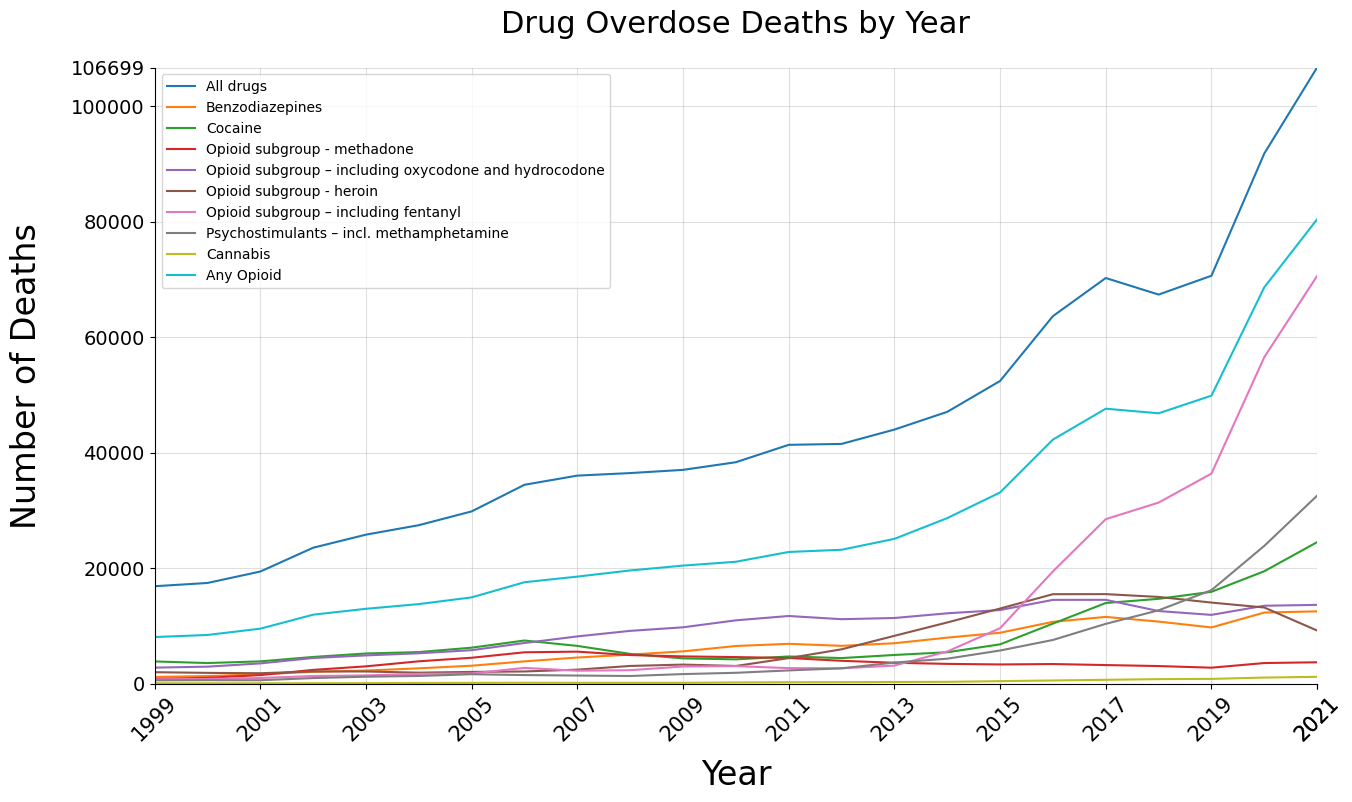

In [170]:
drug_data_fig = plt.figure(figsize=(15, 8))
drug_data_ax = drug_data_fig.add_subplot()

drug_data_ax.set_title('Drug Overdose Deaths by Year', size=22, pad=25)
drug_data_ax.spines['right'].set_visible(False)
drug_data_ax.spines['top'].set_visible(False)
drug_data_ax.grid(visible=True,
        which='major',
        axis='both',
        alpha=.4)

# Formatting X-Axis
drug_data_ax.set_xlabel('Year', labelpad=10.0, size=24)
drug_data_ax.set_xticks(list(range(1999,2022,2))+[2021])
drug_data_ax.set_xticklabels(years[::2]+[2021], size=15, rotation=45)
drug_data_ax.set_xlim(left=min(years), right=max(years))

# Formatting Y-Axis
drug_data_ax.set_ylabel('Number of Deaths', labelpad=20, size=24)
drug_data_y_labels = [10000*scal for scal in range(0,11,2)]+[max(drug_data['All drugs'])]
drug_data_ax.set_yticks(drug_data_y_labels)
drug_data_ax.set_yticklabels(labels=drug_data_y_labels, size=14)
drug_data_ax.set_ylim(bottom=0, top=drug_data['All drugs'][2021])

# Plotting lines for each drug
for drug in drug_types:
      drug_data_ax.plot(years,drug_data[drug], label=drug)

drug_data_ax.legend(loc='upper left')


Percentage of < 1 year deaths: 0.07%
Percentage of 1-4 years deaths: 0.10%
Percentage of 5-14 years deaths: 0.83%
Percentage of 15-24 years deaths: 9.86%
Percentage of 25-34 years deaths: 21.63%
Percentage of 35-44 years deaths: 24.45%
Percentage of 45-54 years deaths: 23.14%
Percentage of 55-64 years deaths: 14.77%
Percentage of 65-74 years deaths: 3.62%
Percentage of 75-84 years deaths: 1.04%
Percentage of 85+ years deaths: 0.50%


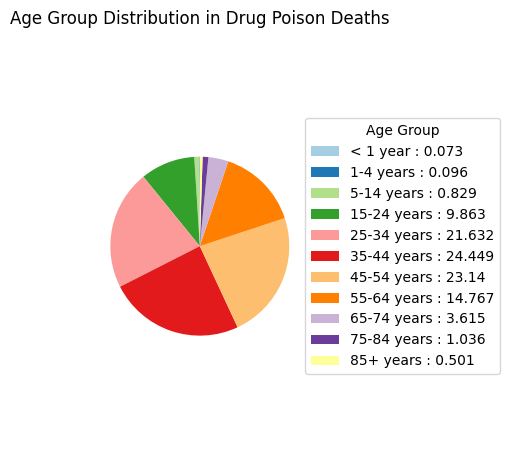

In [186]:
import csv

# Specify the path to your CSV file
csv_file_path = 'Drug_Poisoning_deaths_and_rates.csv'

data_list = []

with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)

    # Skip the header row if present
    header = next(csv_reader, None)

    # Iterate through the rows and append each row to the data_list
    for row in csv_reader:
        data_list.append(row)
# Find the indices of 'Gender' and 'Intent' columns
gender_index = data_list[0].index('Gender')
intent_index = data_list[0].index('Intent')
drug_index = data_list[0].index('Drug type')

# Filter the data for drug poison deaths
drug_poison_data = [row for row in data_list[1:] if row[intent_index] == 'All (preventable, intentional, undetermined)' and row[drug_index] == 'All drugs' and row[gender_index] != 'Both sexes']
drug_poison_data[0]
# Count the occurrences of each gender in drug poison deaths
# Filter the data (both sex) for drug poison deaths
drug_poison_data1 = [row for row in data_list[1:] if row[intent_index] == 'All (preventable, intentional, undetermined)' and row[drug_index] == 'All drugs' and row[gender_index] == 'Both sexes']
drug_poison_data1[0]
# Find the indices of 'Intent' and age-related columns
intent_index = data_list[0].index('Intent')
age_columns = data_list[0][4:15]  # Assuming the age columns are from index 5 to 16

# Count the occurrences of each age group in drug poison deaths
age_counts = {age: 0 for age in age_columns}

for row in drug_poison_data:
    for i, age_group in enumerate(age_columns):
        age_counts[age_group] += int(row[i + 4])  # Adjust index based on the starting column

# Calculate the percentage of different age groups
total_deaths = sum(age_counts.values())
percentage_age_groups = {age: (count / total_deaths) * 100 for age, count in age_counts.items()}

# Display the results
for age, percentage in percentage_age_groups.items():
    print(f"Percentage of {age} deaths: {percentage:.2f}%")


# Plotting Age Group Percentages
labels_age = list(percentage_age_groups.keys())
sizes_age = list(percentage_age_groups.values())
sizes_age = [round(x, 3) for x in sizes_age]

for i in range(len(labels_age)):
    labels_age[i] = labels_age[i] + " : " + str(sizes_age[i])
    
colors_age = plt.cm.Paired(range(len(labels_age)))

plt.subplot(1, 2, 2)
plt.pie(sizes_age, colors=colors_age, startangle=90)
plt.axis('equal')
plt.title('Age Group Distribution in Drug Poison Deaths')

plt.legend(labels_age, title="Age Group", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


[383214, 104660, 3561, 96121, 567980] [826062, 158113, 10761, 261355, 1183083]


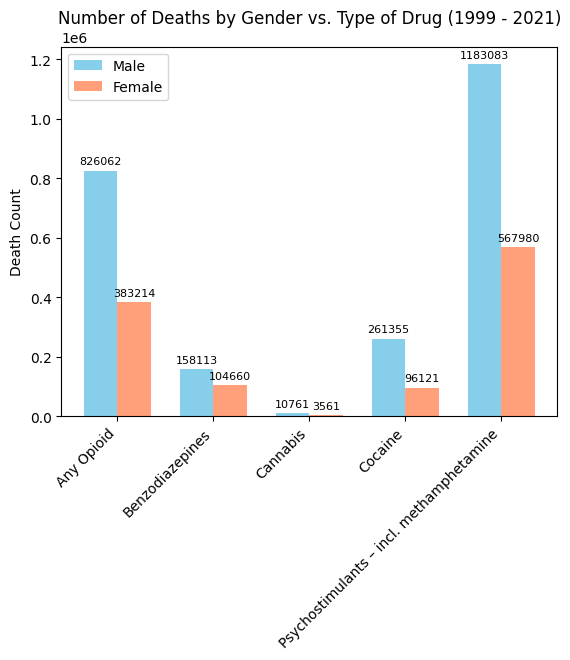

[67283, 55339, 162398, 276301] [228667, 94324, 389088, 558310]


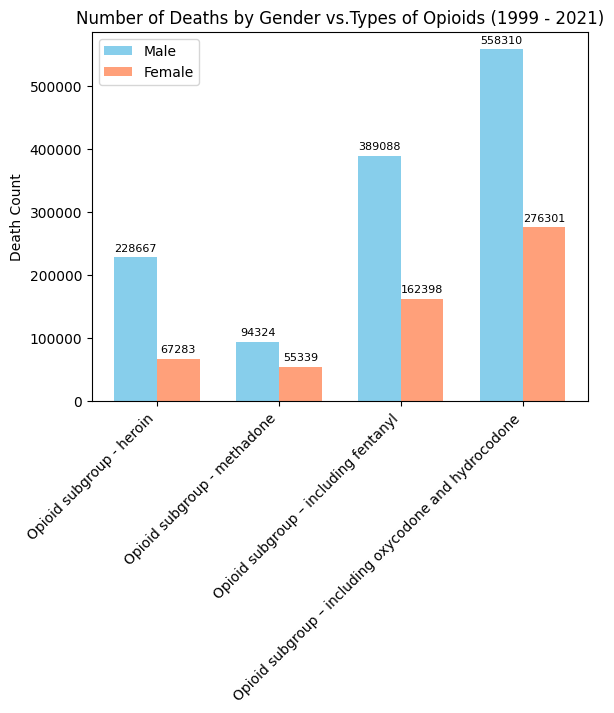

In [196]:
import csv

# Specify the path to your CSV file
csv_file_path = 'Drug_Poisoning_deaths_and_rates.csv'

data_list = []

with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)


    # Iterate through the rows and append each row to the data_list
    for row in csv_reader:
        data_list.append(row)

data_list[1]
# Find the indices of 'Gender' and 'Intent' columns
gender_index = data_list[0].index('Gender')
intent_index = data_list[0].index('Intent')
drug_index = data_list[0].index('Drug type')

# Filter the data for drug poison deaths
drug_poison_data = [row for row in data_list[2:-1] if row[gender_index] != 'Both sexes' 
                                                and row[drug_index] != 'All drugs' 
                                                and row[drug_index] != 'Opioid subgroup - heroin' 
                                                and row[drug_index] != 'Opioid subgroup - methadone' 
                                                and row[drug_index] != 'Opioid subgroup – including fentanyl'
                                                and row[drug_index] != 'Opioid subgroup – including oxycodone and hydrocodone'] 
drug_poison_data[:20]
# Count the occurrences of each gender in drug poison deaths
all_drug_counts_F = {'Any Opioid': 0, 'Benzodiazepines': 0, 'Cannabis':0,  'Cocaine':0,  'Psychostimulants – incl. methamphetamine':0}
all_drug_counts_M = {'Any Opioid': 0, 'Benzodiazepines': 0, 'Cannabis':0,  'Cocaine':0,  'Psychostimulants – incl. methamphetamine':0}

for row in drug_poison_data:
    drug = row[drug_index]
    gender = row[gender_index]
    if drug == 'Any Opioid':
        if gender == 'Male':
            all_drug_counts_M['Any Opioid'] += int(row[-1]) # all ages 
        else:
            all_drug_counts_F['Any Opioid'] += int(row[-1]) # all ages 
    if drug == 'Benzodiazepines':
        if gender == 'Male':
            all_drug_counts_M['Benzodiazepines'] += int(row[-1])
        else:
            all_drug_counts_F['Benzodiazepines'] += int(row[-1])
    if drug == 'Cannabis':
        if gender == 'Male':
            all_drug_counts_M['Cannabis'] += int(row[-1])
        else:
            all_drug_counts_F['Cannabis'] += int(row[-1])
    if drug == 'Cocaine':
        if gender == 'Male':
            all_drug_counts_M['Cocaine'] += int(row[-1])
        else:
            all_drug_counts_F['Cocaine'] += int(row[-1])
    else:
        if gender == 'Male':
            all_drug_counts_M['Psychostimulants – incl. methamphetamine'] += int(row[-1])
        else:
            all_drug_counts_F['Psychostimulants – incl. methamphetamine'] += int(row[-1])
# Calculate the amount of different genders:
female_data = list(all_drug_counts_F.values())
male_data = list(all_drug_counts_M.values())
print(female_data, male_data)
# graph 1
drugs = ['Any Opioid', 'Benzodiazepines', 'Cannabis', 'Cocaine', 'Psychostimulants – incl. methamphetamine']
x = np.arange(len(drugs))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_data, width, label='Male', color='skyblue')
rects2 = ax.bar(x + width/2, female_data, width, label='Female', color='lightsalmon')

ax.set_ylabel('Death Count')
ax.set_title('Number of Deaths by Gender vs. Type of Drug (1999 - 2021)')
ax.set_xticks(x)
ax.set_xticklabels(drugs, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

autolabel(rects1)
autolabel(rects2)

plt.savefig('Number of Deaths by Gender vs. Type of Drug (1999 - 2021).png', dpi=500)  

plt.show()
# Filter the data for drug poison deaths
drug_poison_data = [row for row in data_list[2:-1] if row[gender_index] != 'Both sexes' 
                                                and row[drug_index] != 'All drugs' 
                                                and row[drug_index] != 'Any Opioid'
                                                and row[drug_index] != 'Benzodiazepines'
                                                and row[drug_index] != 'Cannabis'
                                                and row[drug_index] != 'Cocaine' 
                                                and row[drug_index] != 'Psychostimulants – incl. methamphetamine'] 
# Count the occurrences of each gender in drug poison deaths
all_drug_counts_F = {'Opioid subgroup - heroin': 0, 'Opioid subgroup - methadone': 0, 'Opioid subgroup – including fentanyl':0,  'Opioid subgroup – including oxycodone and hydrocodone':0}
all_drug_counts_M = {'Opioid subgroup - heroin': 0, 'Opioid subgroup - methadone': 0, 'Opioid subgroup – including fentanyl':0,  'Opioid subgroup – including oxycodone and hydrocodone':0}

for row in drug_poison_data:
    drug = row[drug_index]
    gender = row[gender_index]
    if drug == 'Opioid subgroup - heroin':
        if gender == 'Male':
            all_drug_counts_M['Opioid subgroup - heroin'] += int(row[-1]) # all ages 
        else:
            all_drug_counts_F['Opioid subgroup - heroin'] += int(row[-1]) # all ages 
    if drug == 'Opioid subgroup - methadone':
        if gender == 'Male':
            all_drug_counts_M['Opioid subgroup - methadone'] += int(row[-1])
        else:
            all_drug_counts_F['Opioid subgroup - methadone'] += int(row[-1])
    if drug == 'Opioid subgroup – including fentanyl':
        if gender == 'Male':
            all_drug_counts_M['Opioid subgroup – including fentanyl'] += int(row[-1])
        else:
            all_drug_counts_F['Opioid subgroup – including fentanyl'] += int(row[-1])
    else:
        if gender == 'Male':
            all_drug_counts_M['Opioid subgroup – including oxycodone and hydrocodone'] += int(row[-1])
        else:
            all_drug_counts_F['Opioid subgroup – including oxycodone and hydrocodone'] += int(row[-1])
    
# Calculate the amount of different genders:
female_data = list(all_drug_counts_F.values())
male_data = list(all_drug_counts_M.values())
print(female_data, male_data)
# graph 1
drugs = ['Opioid subgroup - heroin', 'Opioid subgroup - methadone', 'Opioid subgroup – including fentanyl', 'Opioid subgroup – including oxycodone and hydrocodone']
x = np.arange(len(drugs))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_data, width, label='Male', color='skyblue')
rects2 = ax.bar(x + width/2, female_data, width, label='Female', color='lightsalmon')

ax.set_ylabel('Death Count')
ax.set_title('Number of Deaths by Gender vs.Types of Opioids (1999 - 2021)')
ax.set_xticks(x)
ax.set_xticklabels(drugs, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

autolabel(rects1)
autolabel(rects2)

plt.show()